# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:

# Define base URL and unit temperatiure 
baseUrl = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create an empty list to hold the value of the all the data that we will extract from the API
weatherCheck = []

# Set the record counter and set counter to 1
recordCounter = 1
setCounter = 1

# This will print the beginning of the data retrieval
print("Beginning Data Retrieval")
print("------------------------------")

# for each city in the cities list
for city in cities:
    
    # write query URL
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    
    # Jsonify the data
    weatherResponse = requests.get(query_url).json()
    
    # Try to grab the weather data if they are available in the API
    try:
        cityName = weatherResponse["name"]
        lat = weatherResponse["coord"]["lat"]
        lng = weatherResponse["coord"]["lon"]
        maxTemp = weatherResponse["main"]["temp_max"]    
        humidity = weatherResponse["main"]["humidity"]     
        cloudiness = weatherResponse["clouds"]["all"] 
        windSpeed = weatherResponse["wind"]["speed"] 
        country = weatherResponse["sys"]["country"]     
        date = weatherResponse["dt"]        
        
        # Append the collected data in the empty list
        weatherCheck.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        
        
        if recordCounter > 50:
            setCounter += 1
            recordCounter = 1
        print(f"Processing Record {recordCounter} of Set {setCounter} | {city}")
        recordCounter += 1
        
    # Handle exceptions for a data that is not available in the API    
    except:
        print("City not found. Skipping...")
 

# Print at the end of the data retrieval
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | busselton
City not found. Skipping...
Processing Record 2 of Set 1 | aleksandrov gay
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | basco
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | amapa
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | tazovskiy
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | palafrugell
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | reshetylivka
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | qinggang
Processing Record 21 of Set 1 | buala
City not found. Skipping...
P

Processing Record 40 of Set 4 | dubbo
Processing Record 41 of Set 4 | nea iraklitsa
Processing Record 42 of Set 4 | healdsburg
Processing Record 43 of Set 4 | kosikha
Processing Record 44 of Set 4 | jutai
Processing Record 45 of Set 4 | sulangan
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | arraial do cabo
City not found. Skipping...
Processing Record 48 of Set 4 | staffanstorp
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | okhotsk
Processing Record 1 of Set 5 | alugan
Processing Record 2 of Set 5 | manzhouli
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | barabai
Processing Record 5 of Set 5 | constantine
Processing Record 6 of Set 5 | matara
Processing Record 7 of Set 5 | matadi
Processing Record 8 of Set 5 | braganca
Processing Record 9 of Set 5 | deputatskiy
Processing Record 10 of Set 5 | boke
City not found. Skipping...
Processing Record 11 of Set 5 | sangar
City not found. Skipping...
Processing Record 1

Processing Record 24 of Set 8 | kaeo
Processing Record 25 of Set 8 | bafata
Processing Record 26 of Set 8 | bairiki
City not found. Skipping...
Processing Record 27 of Set 8 | altamira
Processing Record 28 of Set 8 | warkworth
Processing Record 29 of Set 8 | adrar
City not found. Skipping...
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | lannion
Processing Record 33 of Set 8 | broken hill
Processing Record 34 of Set 8 | tuktoyaktuk
Processing Record 35 of Set 8 | sale
City not found. Skipping...
Processing Record 36 of Set 8 | ebolowa
Processing Record 37 of Set 8 | kungsbacka
City not found. Skipping...
Processing Record 38 of Set 8 | grindavik
City not found. Skipping...
Processing Record 39 of Set 8 | kyra
Processing Record 40 of Set 8 | yei
Processing Record 41 of Set 8 | alta floresta
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | namatanai
Pr

Processing Record 11 of Set 12 | almaznyy
Processing Record 12 of Set 12 | rio grande
Processing Record 13 of Set 12 | truro
Processing Record 14 of Set 12 | buri
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Export the city data into a DataFrame
cityData_df = pd.DataFrame(weatherCheck)
cityData_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [34]:
# Display the DataFrame
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,84,10,13.87,AU,1594582566
1,Aleksandrov Gay,50.15,48.57,75.72,53,81,14.72,RU,1594582634
2,Bluff,-46.60,168.33,39.00,83,85,3.00,NZ,1594582634
3,Kaitangata,-46.28,169.85,37.00,75,7,5.01,NZ,1594582634
4,Saint Paul Harbor,57.79,-152.41,55.40,82,90,6.93,US,1594582634
...,...,...,...,...,...,...,...,...,...
559,Glasgow,55.87,-4.26,62.01,67,90,12.75,GB,1594582423
560,Almaznyy,48.04,40.05,78.80,50,40,8.95,RU,1594582671
561,Rio Grande,-32.03,-52.10,55.40,76,75,3.36,BR,1594582671
562,Truro,50.27,-5.05,62.60,77,0,5.82,GB,1594582671


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# Display the descriptive statistics
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.814894,21.061826,69.742801,70.342199,52.283688,7.774291,1.594583e+09
std,33.356044,92.180211,14.443522,20.939181,39.170362,5.253995,8.337074e+01
min,-54.800000,-179.170000,32.450000,3.000000,0.000000,0.180000,1.594582e+09
25%,-8.192500,-60.717500,58.110000,57.000000,7.000000,3.615000,1.594583e+09
50%,25.020000,24.495000,71.600000,75.000000,59.500000,6.710000,1.594583e+09
75%,47.722500,110.232500,80.600000,87.000000,90.000000,10.427500,1.594583e+09
max,78.220000,179.320000,107.010000,100.000000,100.000000,31.990000,1.594583e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.
over100Humidity = cityData_df.loc[cityData_df["Humidity"] > 100]
over100Humidity_index = over100Humidity.index
over100Humidity_index

Int64Index([], dtype='int64')

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityData_df = cityData_df.drop(labels = over100Humidity_index, inplace = False)

cleanCityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,84,10,13.87,AU,1594582566
1,Aleksandrov Gay,50.15,48.57,75.72,53,81,14.72,RU,1594582634
2,Bluff,-46.60,168.33,39.00,83,85,3.00,NZ,1594582634
3,Kaitangata,-46.28,169.85,37.00,75,7,5.01,NZ,1594582634
4,Saint Paul Harbor,57.79,-152.41,55.40,82,90,6.93,US,1594582634
...,...,...,...,...,...,...,...,...,...
559,Glasgow,55.87,-4.26,62.01,67,90,12.75,GB,1594582423
560,Almaznyy,48.04,40.05,78.80,50,40,8.95,RU,1594582671
561,Rio Grande,-32.03,-52.10,55.40,76,75,3.36,BR,1594582671
562,Truro,50.27,-5.05,62.60,77,0,5.82,GB,1594582671


In [38]:
# # Extract relevant fields from the data frame
latitude = cleanCityData_df["Lat"]
longitude = cleanCityData_df["Lng"]
temperature = cleanCityData_df["Max Temp"]
humidity = cleanCityData_df["Humidity"]
cloudiness = cleanCityData_df["Cloudiness"]
wind_speed = cleanCityData_df["Wind Speed"]

cleanCityData_df.reset_index()
cleanCityData_df.index.name = "City_ID"

# Export the City_Data into a csv

outputData = cleanCityData_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

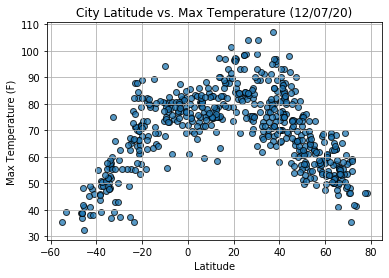

In [39]:

# Set the current date
currentDate = pd.to_datetime("today")
currentDate = currentDate.strftime("%d/%m/%y")

# Plot the scatter plot
plt.scatter(latitude, temperature, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({currentDate})")
plt.grid(True)

# Save the figure
plt.savefig("../Output/lat_temp.png")

# Observable Trends:

* As we approach the equator, the weather gets hotter.
* As we move away from the equator i.e. towards northern hemisphere or southern hemisphere, the temperature decreases.
* At the latitude between 20 to 40 degrees, we observe maximum temperature.


## Latitude vs. Humidity Plot

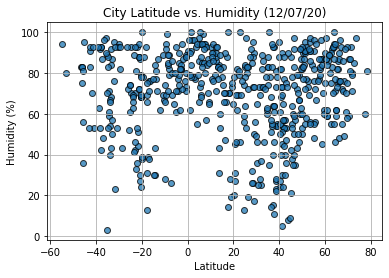

In [40]:
# Plot the scatter plot
plt.scatter(latitude, humidity, marker = "o", alpha = 0.75, edgecolors = "black")

# Set aesthetics
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({currentDate})")
plt.grid(True)

# Save the figure
plt.savefig("../Output/lat_humidity.png")

# Observable Trend:

* The Northern hemisphere has more humid weather than Southern hemisphere. 
* Most city has higher humidity percentage i.e. greater than 60%.

## Latitude vs. Cloudiness Plot

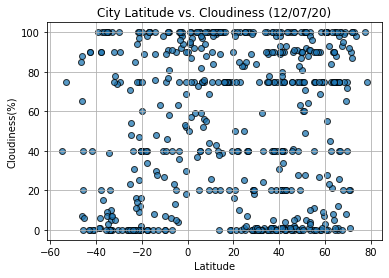

In [41]:
# Plot the scatter plot and aesthetics
plt.scatter(latitude, cloudiness, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({currentDate})")
plt.grid(True)

plt.savefig("../Output/lat_cloudiness.png")


# Observable Trend:

There is no observable trend between latitude and cloudiness. In other words, we can say that cloudiness does not depend on latitude.

## Latitude vs. Wind Speed Plot

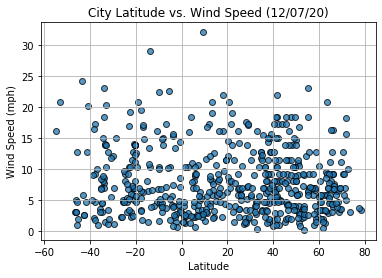

In [42]:
# Plot the scatter plot and aesthetics
plt.scatter(latitude, wind_speed, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({currentDate})")
plt.grid(True)

plt.savefig("../Output/lat_windSpeed.png")


# Observable Trend:

* The range of wind speed lies between 0 mph to 10 mph. 
* Cities near the extreme southern or northern hemisphere observe increase in wind speed.

## Linear Regression

In [43]:
#Create a function to create Linear Regression plots

def linearRegression(x_value, y_value, x_annotation, y_annotation):
 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue** 2}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value,y_value, marker="o", edgecolors = "black", alpha = 0.75)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_annotation, y_annotation),fontsize = 20, color="red")


In [44]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = []
southernHemisphere = []


for city in cities:
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:

        if response["coord"]["lat"] >= 0:

            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            northernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        else:
            
            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            southernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
           
    except:
        
        print("City not found. Skipping...")
        

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [45]:
# Create northern and southern hemisphere DataFrame
northernHemisphere_df = pd.DataFrame(northernHemisphere)
southernHemisphere_df = pd.DataFrame(southernHemisphere)

# Save the data in the Output folder
northernHemisphere_data = northernHemisphere_df.to_csv("../Output/northern_hemisphere_data.csv")


northernHemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aleksandrov Gay,50.15,48.57,75.72,53,81,14.72,RU,1594582634
1,Saint Paul Harbor,57.79,-152.41,55.40,82,90,6.93,US,1594582634
2,Butaritari,3.07,172.79,83.39,77,59,15.99,KI,1594582634
3,São Filipe,14.90,-24.50,74.34,78,39,10.67,CV,1594582634
4,Basco,20.45,121.97,84.36,78,100,14.43,PH,1594582509


In [46]:
# Save the data to the output folder
southernHemisphere_data = southernHemisphere_df.to_csv("../Output/southern_hemisphere_data.csv")

southernHemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,84,10,13.87,AU,1594582566
1,Bluff,-46.60,168.33,39.00,83,85,3.00,NZ,1594582634
2,Kaitangata,-46.28,169.85,37.00,75,7,5.01,NZ,1594582634
3,Ushuaia,-54.80,-68.30,35.60,94,40,16.11,AR,1594582634
4,Codrington,-38.27,141.97,43.84,92,1,2.04,AU,1594582523


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4275454901653234


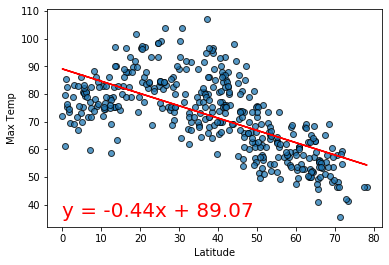

In [47]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Max Temp"], northernHemisphere_df["Lat"].min(), northernHemisphere_df["Max Temp"].min())  
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Output/linreg_north_lat_temp.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6717848124819213


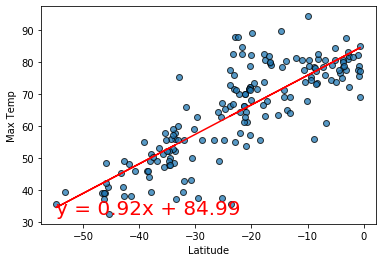

In [55]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Max Temp"], southernHemisphere_df["Lat"].min(), southernHemisphere_df["Max Temp"].min())
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Output/linreg_south_lat_temp.png")

plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* As we move away from the equator, we observe a decrease in temperature.
* The r-squared value of northern hemisphere is 0.44 which means  that the model explains almost all the variability of the data around its mean.
* As per the Southern hemisphere plot, we observe that as we approach towards the equator, the temperature increases. 
*  The r-squared value of southern hemisphere is 0.54 which means  that the model explains almost all the variability of the data around its mean.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.2801936513294531e-05


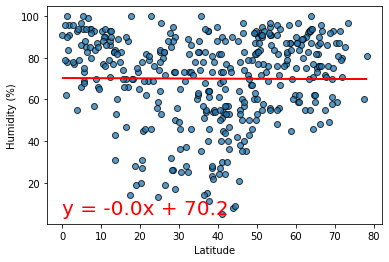

In [58]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Humidity"], northernHemisphere_df["Lat"].min() , northernHemisphere_df["Humidity"].min())
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Output/linreg_north_lat_humidity.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0012206931529582415


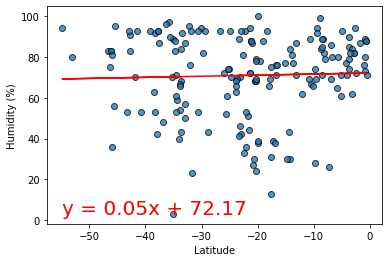

In [59]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Humidity"], southernHemisphere_df["Lat"].min() , southernHemisphere_df["Humidity"].min() )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Output/linreg_south_lat_humidity.png")

plt.show()


# Observable Trends - Northern and Southern hemisphere Latitude vs Humidity(%)

* Northern hemisphere is more humid than southern hemisphere.
* The r-squared value of northern hemisphere is 0.0126 and that of southern hemisphere is 0.00105 which means  that the model failed to explain the variablity of humidity.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009678237395073078


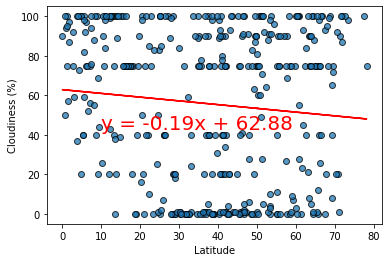

In [51]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Cloudiness"], 10, 43)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Output/linreg_north_lat_cloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04120237959128066


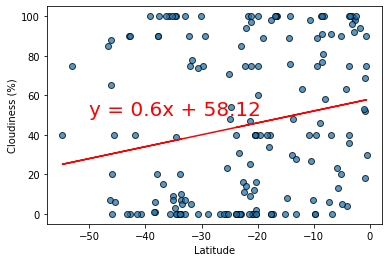

In [52]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Cloudiness"], -50, 50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Output/linreg_south_lat_cloudiness.png")

plt.show()


# Observable Trends - Northern and Southern hemisphere Latitude vs Cloudiness(%)

* Nothern hemisphere is more cloudy than southern hemisphere.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 5.688943446372362e-05


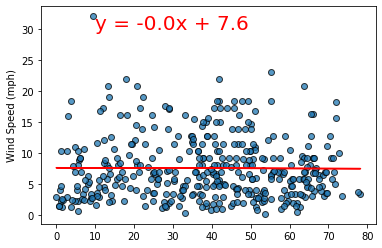

In [53]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Wind Speed"], 10, 30)
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Output/linreg_north_lat_wind.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0025374756283390713


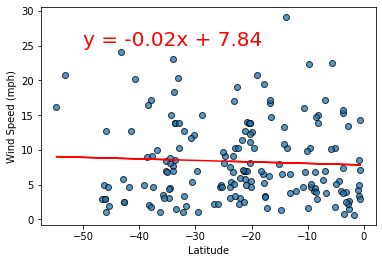

In [54]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Wind Speed"], -50, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Output/linreg_south_lat_wind.png")

plt.show()


# Observable Trends - Northern and Southern hemisphere Latitude vs Wind Speed (mph)

* In northern hemisphere, most cities are having wind speed in the range between 0 mph to 15 mph.
* In southern hemkisphere, most cities have wind speed between 0 mph to 10 mph.
